In [39]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [23]:
df.shape

(6362620, 11)

In [22]:
df.dtypes

step                int16
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud              bool
isFlaggedFraud       bool
dtype: object

In [ ]:
df['step'] = df['step'].astype('int16')
df['isFraud'] = df['isFraud'].astype('bool')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('bool')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int16  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         bool   
 10  isFlaggedFraud  bool   
dtypes: bool(2), float64(5), int16(1), object(3)
memory usage: 412.6+ MB


In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [42]:
df['typeOrig'] = df['nameOrig'].str.strip().str[0]

In [43]:
df['typeDest'] = df['nameDest'].str.strip().str[0]

In [45]:
df['typeOrig'].unique()

array(['C'], dtype=object)

<AxesSubplot:xlabel='typeDest', ylabel='typeOrig'>

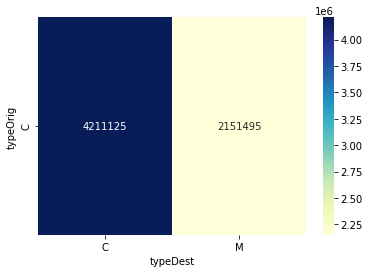

In [51]:
cross_tab = pd.crosstab(df['typeOrig'], df['typeDest'])

sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')

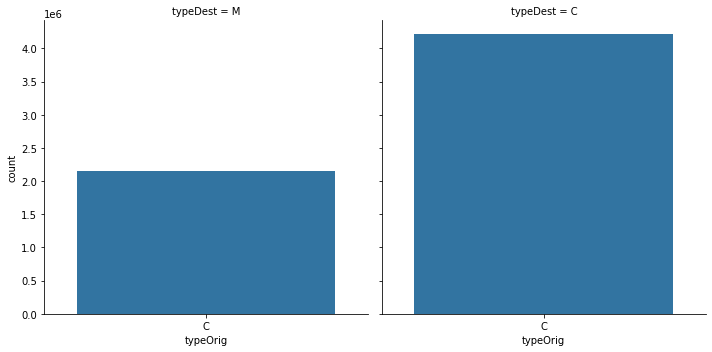

In [52]:
sns.catplot(data=df, kind='count', x='typeOrig', col='typeDest')

C:\Users\abgnp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


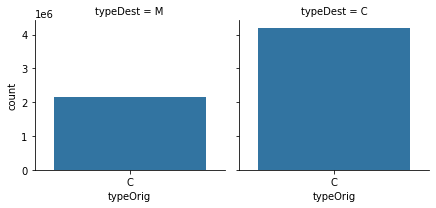

In [53]:
g = sns.FacetGrid(df, col='typeDest', col_wrap=3)
g.map(sns.countplot, 'typeOrig')